# 서울시 구별 CCTV 현황 분석하기


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [20]:
#다운로드 받은 01. CCTV_in_Seoul.csv 파일을 읽으세요. encoding='utf-8' 로 읽으세요. 


In [23]:
# 컬럼 정보를 읽으세요. 


,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613
5,광진구,707,573,78,53,174
6,구로구,1561,1142,173,246,323
7,금천구,1015,674,51,269,354
8,노원구,1265,542,57,451,516
9,도봉구,485,238,159,42,386


,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613
5,광진구,707,573,78,53,174
6,구로구,1561,1142,173,246,323
7,금천구,1015,674,51,269,354
8,노원구,1265,542,57,451,516
9,도봉구,485,238,159,42,386


In [38]:
#CCTV_Seoul.columns[0] 번째 정보를 '구별' 이라는 이름으로 바꾸세요. 

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613
5,광진구,707,573,78,53,174
6,구로구,1561,1142,173,246,323
7,금천구,1015,674,51,269,354
8,노원구,1265,542,57,451,516
9,도봉구,485,238,159,42,386


## 2-2. 엑셀파일 읽기 - 서울시 인구현황

In [73]:
# 01. population_in_Seoul.xls 엑셀 파일을 읽으세요. pip install xlrd 설치가 필요함 

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764
5,2017.1/4,용산구,106544,244203,119132,125071,229456,111167,118289,14747,7965,6782,2.15,36231
6,2017.1/4,성동구,130868,311244,153768,157476,303380,150076,153304,7864,3692,4172,2.32,39997
7,2017.1/4,광진구,158960,372164,180992,191172,357211,174599,182612,14953,6393,8560,2.25,42214
8,2017.1/4,동대문구,159839,369496,182932,186564,354079,177021,177058,15417,5911,9506,2.22,54173
9,2017.1/4,중랑구,177548,414503,206102,208401,409882,204265,205617,4621,1837,2784,2.31,56774


In [141]:
# 01. population_in_Seoul.xls 서울의 인구수에 대한 파일을 읽으세요. 
# usecols = 'B, D, G, J, N' 옵션을 사용하여 해당 컬럼만 읽어 들이세요. 

,자치구,인구,인구.3,인구.6,65세이상고령자
0,자치구,합계,한국인,등록외국인,65세이상고령자
1,자치구,계,계,계,65세이상고령자
2,합계,10197604,9926968,270636,1321458
3,종로구,162820,153589,9231,25425
4,중구,133240,124312,8928,20764
5,용산구,244203,229456,14747,36231
6,성동구,311244,303380,7864,39997
7,광진구,372164,357211,14953,42214
8,동대문구,369496,354079,15417,54173
9,중랑구,414503,409882,4621,56774


In [143]:
# 각컬럼명을 '구별' '인구수', '한국인', '외국인', '고령자' 로 바꾸세요. 

# 3. CCTV 데이터 파악하기

In [57]:
CCTV_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [62]:
#'소계'로 오름차순 정렬하여 앞에서부터 5개만 보여주세요. 
CCTV_seoul.sort_values(["소계"]).head()


,기관명,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [63]:
#'소계'로 내림차순 정렬하여 앞에서부터 5개만 보여주세요. 
CCTV_seoul.sort_values(["소계"],ascending=False).head()


,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [67]:
# '최근증가율' 컬럼에  (2016년도컬럼 + 2015년도컬럼 + 2014년도컬럼 )/ 2013년도 이전  * 100 으로 계산하여 채우세요.

CCTV_seoul['최근증가율'] = (CCTV_seoul['2016년'] + CCTV_seoul['2015년'] +  \
                       CCTV_seoul['2014년']) / CCTV_seoul['2013년도 이전']  * 100

# 최근증가율 컬럼으로 내림차순 정렬하여 앞에서부터 5개만 보여주세요. 
CCTV_seoul.sort_values(by='최근증가율', ascending=False).head(5)

,기관명,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


# 5. 서울시 인구 데이터 파악하기

,구별,인구수,한국인,외국인,고령자
0,자치구,합계,한국인,등록외국인,65세이상고령자
1,자치구,계,계,계,65세이상고령자
2,합계,10197604,9926968,270636,1321458
3,종로구,162820,153589,9231,25425
4,중구,133240,124312,8928,20764


In [154]:
# 위의 데이터중 첫번째 행을 지우세요. 합계정보는 필요

In [156]:
# '구별' 정보에서 unique() 함수를 사용하여 유니크한 값만 뽑으세요. 

,구별,인구수,한국인,외국인,고령자
3,종로구,162820,153589,9231,25425
4,중구,133240,124312,8928,20764
5,용산구,244203,229456,14747,36231
6,성동구,311244,303380,7864,39997
7,광진구,372164,357211,14953,42214
8,동대문구,369496,354079,15417,54173
9,중랑구,414503,409882,4621,56774
10,성북구,461260,449773,11487,64692
11,강북구,330192,326686,3506,54813
12,도봉구,348646,346629,2017,51312


In [157]:
#pop_Seoul에 '구별' 정보가 null 인지 체크하세요. isnull() 함수 사용 

3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28     True
Name: 구별, dtype: bool

In [160]:
# 위에서 찾은 26번째 행을 지우세요. 

In [161]:
# '고령자비율' 컬럼 = 고령자컬럼 / 인구수 컬럼 * 100 
# '외국인비율' 컬럼 = 외국인컬럼 / 인구수 컬럼 * 100

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
3,종로구,162820,153589,9231,25425,5.669451,15.615404
4,중구,133240,124312,8928,20764,6.70069,15.583909
5,용산구,244203,229456,14747,36231,6.038828,14.836427
6,성동구,311244,303380,7864,39997,2.526635,12.850689
7,광진구,372164,357211,14953,42214,4.017852,11.342849


In [163]:
# '인구수'로 내림차순 정렬하여 앞에서부터 5개만 보여주세요. 

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
26,송파구,667483,660584,6899,72506,1.033584,10.862599
18,강서구,603772,597248,6524,72548,1.08054,12.015794
25,강남구,570500,565550,4950,63167,0.86766,11.072217
13,노원구,569384,565565,3819,71941,0.670725,12.634883
23,관악구,525515,507203,18312,68082,3.484582,12.955291


In [164]:
# '외국인' 으로 내림차순 정렬하여 앞에서부터 5개만 보여주세요.

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
21,영등포구,402985,368072,34913,52413,8.663598,13.006191
19,구로구,447874,416487,31387,56833,7.007998,12.689506
20,금천구,255082,236353,18729,32970,7.342345,12.925255
23,관악구,525515,507203,18312,68082,3.484582,12.955291
8,동대문구,369496,354079,15417,54173,4.17244,14.661322


In [165]:
# '외국인비율' 로 내림차순 정렬하여 5개만 보여주세요. 

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
21,영등포구,402985,368072,34913,52413,8.663598,13.006191
20,금천구,255082,236353,18729,32970,7.342345,12.925255
19,구로구,447874,416487,31387,56833,7.007998,12.689506
4,중구,133240,124312,8928,20764,6.70069,15.583909
5,용산구,244203,229456,14747,36231,6.038828,14.836427


In [166]:
# '고령자' 로 내림차순 정렬하여 앞에서 부터 5개만 보여주세요. 

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
18,강서구,603772,597248,6524,72548,1.08054,12.015794
26,송파구,667483,660584,6899,72506,1.033584,10.862599
14,은평구,494388,489943,4445,72334,0.899091,14.631019
13,노원구,569384,565565,3819,71941,0.670725,12.634883
23,관악구,525515,507203,18312,68082,3.484582,12.955291


In [167]:
#고령자비율 컬럼으로 내림차순 정렬하여 5개만 보여주세요. 

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
11,강북구,330192,326686,3506,54813,1.061806,16.600342
3,종로구,162820,153589,9231,25425,5.669451,15.615404
4,중구,133240,124312,8928,20764,6.70069,15.583909
5,용산구,244203,229456,14747,36231,6.038828,14.836427
15,서대문구,327163,314982,12181,48161,3.723221,14.720797


# 6. CCTV 데이터와 인구 데이터 합치고 분석하기

,기관명,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780
5,광진구,707,573,78,53,174,53.228621
6,구로구,1561,1142,173,246,323,64.973730
7,금천구,1015,674,51,269,354,100.000000
8,노원구,1265,542,57,451,516,188.929889
9,도봉구,485,238,159,42,386,246.638655


,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
3,종로구,162820,153589,9231,25425,5.669451,15.615404
4,중구,133240,124312,8928,20764,6.70069,15.583909
5,용산구,244203,229456,14747,36231,6.038828,14.836427
6,성동구,311244,303380,7864,39997,2.526635,12.850689
7,광진구,372164,357211,14953,42214,4.017852,11.342849
8,동대문구,369496,354079,15417,54173,4.17244,14.661322
9,중랑구,414503,409882,4621,56774,1.114829,13.696885
10,성북구,461260,449773,11487,64692,2.490353,14.025062
11,강북구,330192,326686,3506,54813,1.061806,16.600342
12,도봉구,348646,346629,2017,51312,0.578524,14.717507


In [173]:
# CCTV_Seoul 데이터프레임과 pop_Seoul 데이터 프레임을 '구별' 정보로 merge 하세요. 


,기관명,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,강남구,570500,565550,4950,63167,0.86766,11.072217
1,강동구,773,379,99,155,377,166.490765,강동구,453233,449019,4214,54622,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,강북구,330192,326686,3506,54813,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,강서구,603772,597248,6524,72548,1.08054,12.015794
4,관악구,1496,846,260,390,613,149.290780,관악구,525515,507203,18312,68082,3.484582,12.955291
5,광진구,707,573,78,53,174,53.228621,광진구,372164,357211,14953,42214,4.017852,11.342849
6,구로구,1561,1142,173,246,323,64.973730,구로구,447874,416487,31387,56833,7.007998,12.689506
7,금천구,1015,674,51,269,354,100.000000,금천구,255082,236353,18729,32970,7.342345,12.925255
8,노원구,1265,542,57,451,516,188.929889,노원구,569384,565565,3819,71941,0.670725,12.634883
9,도봉구,485,238,159,42,386,246.638655,도봉구,348646,346629,2017,51312,0.578524,14.717507


In [28]:
#불필요한 컬럼을 지우세요. '2013년도 이전', '2014년','2015년','2016년' 컬럼 
'''
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
'''


,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [29]:
# '구별' 정보를 index로 설정하세요.  set_index() 함수를 사용하여, inplace=true 옵션을 주세요. 



,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638


In [30]:
# np.corrcoef(첫번째컬럼, 두번째컬럼)함수를 이용하여   '고령자비율'과 '소계' 컬럼의 상관계수를 구하세요. 


array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [31]:
#np.corrcoef() 함수를 이용하여 '외국인비율'과 '소계' 컬럼의 상관계수를 구하세요. 

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [32]:
#np.corrcoef() 함수를 이용하여 '인구수'와 '소계' 컬럼의 상관계수를 구하세요.


array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [33]:
#data_result 데이터의 '소계' 로 내림차순 정렬하여 앞에서부터 5개만 보여주세요.


,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [34]:
#data_result 데이터의 '인구수'로 내림차순 정렬하여 앞에서부터 5개만 보여주세요. 

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


# 8. CCTV와 인구현황 그래프로 분석하기

In [35]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system!!') 

In [35]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


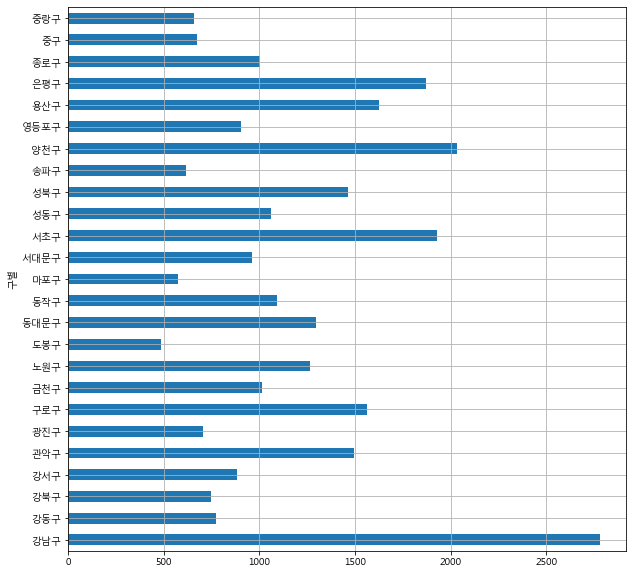

In [36]:
# data_result의 '소계'를 plot하세요. kind='barh', grid=True, figsize=(10,10)





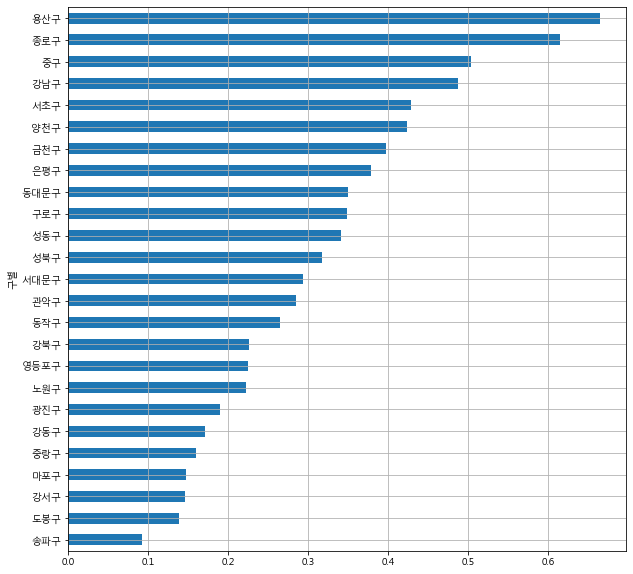

In [38]:
# data_result의 '소계' 정보를 이용하여 정렬한후 barh 를 이용한 그래프를 그리세요. 


# 그래프가 상이합니다.





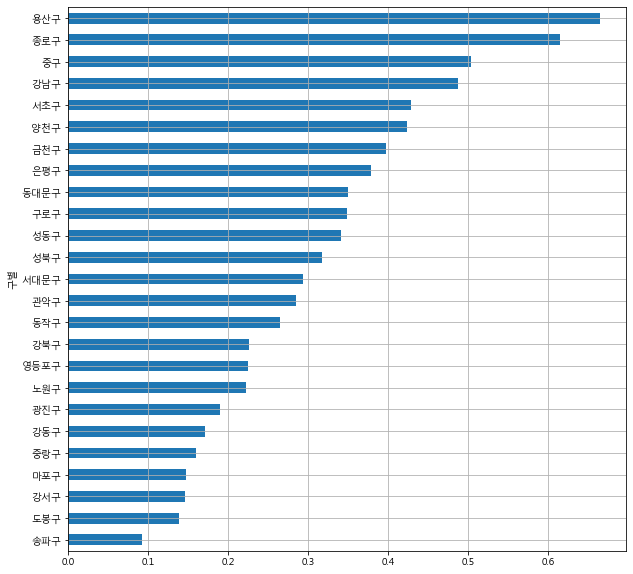

In [39]:
# data_result의 'CCTV비율' 컬럼 = 소계 컬럼 / 인구수 * 100 으로 연산 




# 'CCTV비율' 로 정렬하여 barh 그래프를 그리세요. 





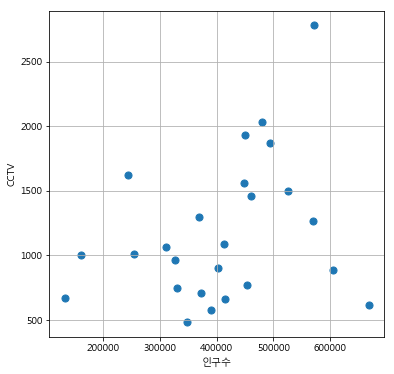

In [39]:
#  scatter 함수로 data_result의 '인구수'와 '소계' 로 ploting 하세요. 









In [40]:
#CCTV와 인구수가 상관관계가 있다고 보고 직선 그래프를 그리기 위한 기울기와 절편을 구함
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([1.30916415e-03, 6.45066497e+02])

In [41]:
#다항식 곡선피팅 
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

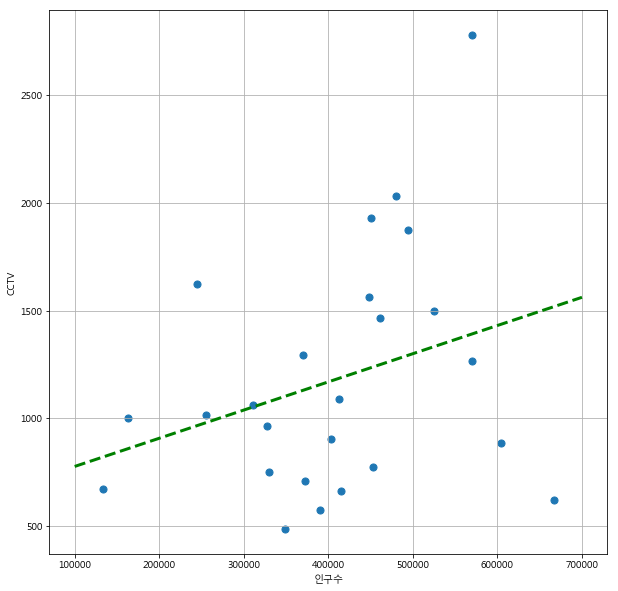

In [42]:
# scatter 함수를 사용하여, data_result의 인구수와 소계 ploting 하세요. 
# 직선 그래프 plotting : plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')









# 10. 조금더 설득력 있는 자료 만들기

In [43]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


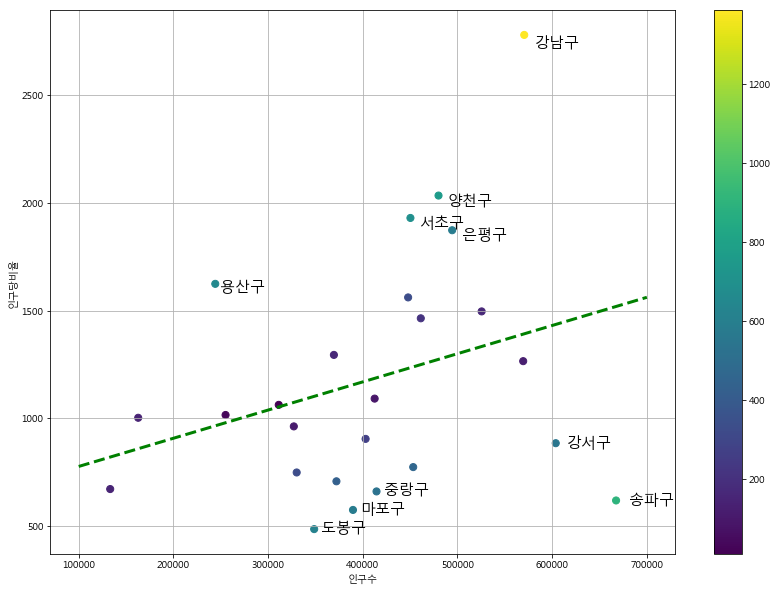

In [44]:
plt.figure(figsize=(14,10))

# data_result의  '인구수'와 '소계를 이용하여 scatter plotting을 하세요. 컬러는 '오차'컬럼으로 정하세요. 

plt.scatter(data_result['인구수'], data_result['소계'], 
            c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, 
             df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()

* 서울시에서 다른 구와 비교했을 때, 강남구, 양천구, 서초구, 은평구는 CCTV가 많지만,
* 송파구, 강서구, 도봉구, 마포구는 다른 구에 비해 CCTV 비율이 낮다